# **ASSIGNMET-1**

 identiying Numbers with Color Background with Regex


In [1]:
import re  
regex = r":\s*(\d*\d+)"

var = '''{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'''
    
match = re.findall(regex, var)
print(" Numbers with Color Background : ", match)

 Numbers with Color Background :  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


*    :\s* - a colon and zero or more whitespace
*   \d* - zero or more digits
*   \d+ - one or more digits

 identiying Numbers with Color Background with Regex


In [2]:
match = []
var = {"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}
for i in var.values():
  for j in i:
    for k in j.values():
      if type(k) == int:
        match.append(k)
print(" NUmbers with Color Background : ", match)

 NUmbers with Color Background :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653, 3]


# **ASSIGNMENT 2**

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Table Of Contents**


*   **Data**
*   **Coloumn Description**
*   **Visualization**
*   **Pre-Processing**
*   **Supervised Learning Model (Classification)**
      
  *   **Logistic Regression**
  *   **K-Nearest Neighbour**
  *   **Dection Tree**
  *   **Random Forest**
  *   **XGBoost** 

* **Artificial Nueral Network**
* **Prediction** 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly as pt
import sklearn
import plotly.graph_objs as go
import seaborn as sns

In [5]:
train_data = pd.read_csv("/content/gdrive/MyDrive/Nextgrowtlabs/Datasets/train_data_evaluation_part_2.csv",index_col=0)

In [6]:
train_data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

In [8]:
train_data.head()
cm = sns.light_palette("green", as_cmap=True)
train_data.head(10).style.background_gradient(cmap=cm)


,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.000000,150,45,371.000000,105.300000,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,nan,1095,61,280.000000,53.000000,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.000000,1095,93,240.000000,60.000000,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,JPN,54.000000,1095,58,230.000000,24.000000,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,JPN,49.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,FRA,32.000000,1095,38,535.000000,94.000000,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
8,9,FRA,42.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
9,10,IRL,25.000000,1095,96,174.000000,69.000000,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data.describe().T.style.set_properties(**{'background-color': '#325436','color': 'white','border-color': 'Black'})

,count,mean,std,min,25%,50%,75%,max
ID,82580.000000,41290.500000,23838.936952,1.000000,20645.750000,41290.500000,61935.250000,82580.000000
Age,78834.000000,45.468554,16.526276,-11.000000,34.000000,46.000000,57.000000,122.000000
DaysSinceCreation,82580.000000,459.138157,311.309295,12.000000,183.000000,406.000000,728.000000,1095.000000
AverageLeadTime,82580.000000,66.557205,87.928995,-1.000000,0.000000,30.000000,104.000000,588.000000
LodgingRevenue,82580.000000,300.457373,373.337007,0.000000,66.400000,234.000000,403.800000,21781.000000
OtherRevenue,82580.000000,67.890023,114.496223,0.000000,2.000000,39.000000,88.000000,7730.250000
BookingsCanceled,82580.000000,0.002047,0.067177,0.000000,0.000000,0.000000,0.000000,9.000000
BookingsNoShowed,82580.000000,0.000642,0.029725,0.000000,0.000000,0.000000,0.000000,3.000000
BookingsCheckedIn,82580.000000,0.798402,0.696880,0.000000,1.000000,1.000000,1.000000,66.000000
PersonsNights,82580.000000,4.667958,4.562507,0.000000,1.000000,4.000000,7.000000,116.000000


In [10]:
train_data['CheckedIn'] = np.where(((train_data['BookingsCheckedIn']-train_data['BookingsCanceled'])>0),1,0)

In [11]:
train_data.head()
cm = sns.light_palette("green", as_cmap=True)
train_data.head(10).style.background_gradient(cmap=cm)

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,CheckedIn
0,1,PRT,51.000000,150,45,371.000000,105.300000,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,PRT,nan,1095,61,280.000000,53.000000,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,DEU,31.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.000000,1095,93,240.000000,60.000000,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,FRA,51.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,JPN,54.000000,1095,58,230.000000,24.000000,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,7,JPN,49.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,FRA,32.000000,1095,38,535.000000,94.000000,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,9,FRA,42.000000,1095,0,0.000000,0.000000,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,10,IRL,25.000000,1095,96,174.000000,69.000000,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
train_data.isnull().sum()

ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
CheckedIn                  0
dtype: int64

**Removing Outliers**

In [13]:
train_data =train_data[train_data['Age'] < 100]

In [14]:
train_data['TotalRevenue'] = train_data['LodgingRevenue'] + train_data['OtherRevenue']

train_data['PersonsRoomNight'] = train_data['PersonsNights'] / train_data['RoomNights']
train_data['PersonsRoomNight'].fillna(0, inplace=True)

train_data['AgeGroups'] = pd.cut(train_data['Age'], bins=[-1, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '60+'])
train_data['AgeGroups'] = train_data['AgeGroups'].cat.add_categories('Unknown')
train_data['AgeGroups'].fillna('Unknown', inplace=True)

avg_by_age = train_data.groupby('AgeGroups').mean()
sum_by_age = train_data.groupby('AgeGroups').sum()
avg_by_nat = train_data.groupby('Nationality').mean()

# **COLOUMNS DESCRIPTION**

In [15]:
train_data.nunique().to_frame(name="Unique Values")

,Unique Values
ID,78826
Nationality,188
Age,100
DaysSinceCreation,1083
AverageLeadTime,417
LodgingRevenue,9913
OtherRevenue,4373
BookingsCanceled,6
BookingsNoShowed,4
BookingsCheckedIn,28


# **DATA VISAULIZATION**

TOP 10 NATIONALITIES 

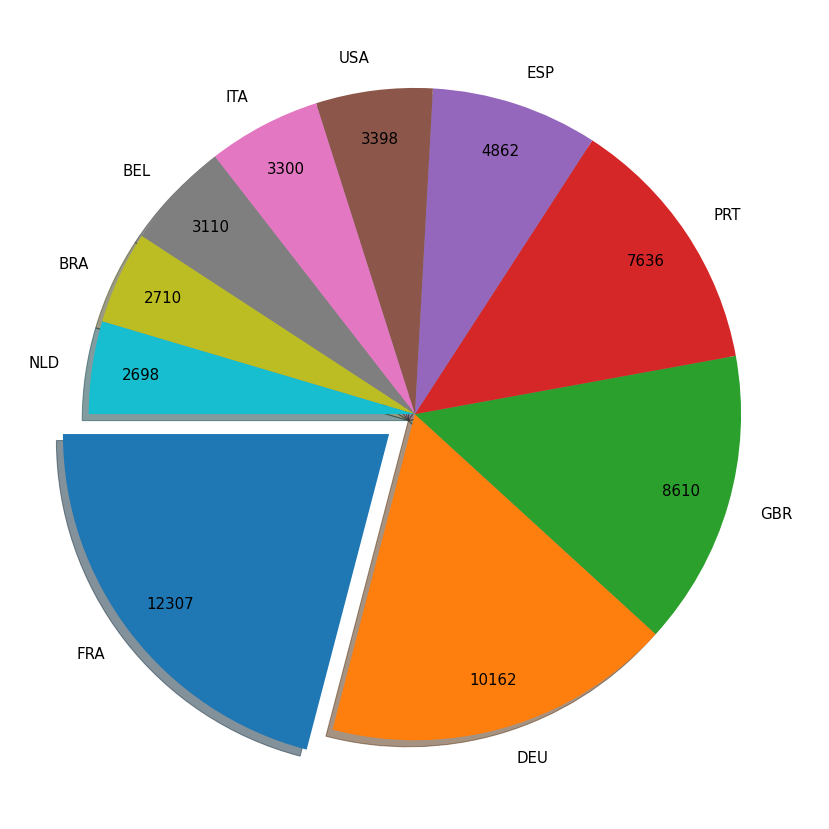

In [16]:
top_10 = train_data['Nationality'].value_counts().head(10)
def absolute_value(val):
    a  = np.round(val/100.*top_10.sum(), 0)
    return int(a)

plt.figure(figsize=(15,15))

plt.rcParams['font.size'] = 15
myexplode = [0.1,0, 0, 0, 0,0,0,0,0,0]
plt.pie(top_10,labels=top_10.keys(),startangle=180,pctdistance=0.85,explode =myexplode,autopct=absolute_value,shadow=True)

plt.show()

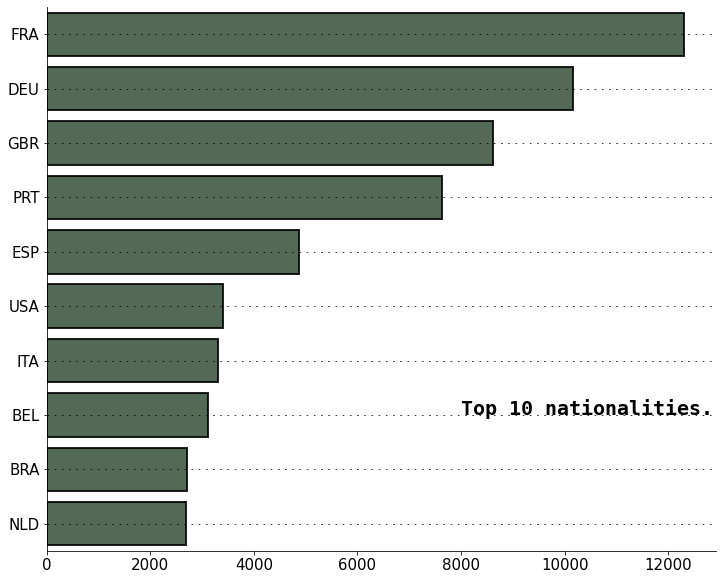

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(data=train_data, y='Nationality', 
              order=train_data['Nationality'].value_counts(sort=True).index[:10], 
              color='#325436', alpha=0.85, linewidth=2, edgecolor='black')
sns.despine()
fig.set_facecolor('#0000')
ax.set_facecolor('#0000')
ax.set_ylabel('')
ax.set_xlabel('')
ax.grid(False)
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.text(8000, 7, 'Top 10 nationalities.', fontsize=20, fontweight='bold', fontfamily='monospace')
#ax.text(8000, 9.4, 'France and Portugal are the most \nfrequent nationalities in the \ndataset. Surprisingly USA placed \n6th in our top 20.', fontsize=13, fontfamily='monospace')
plt.show()

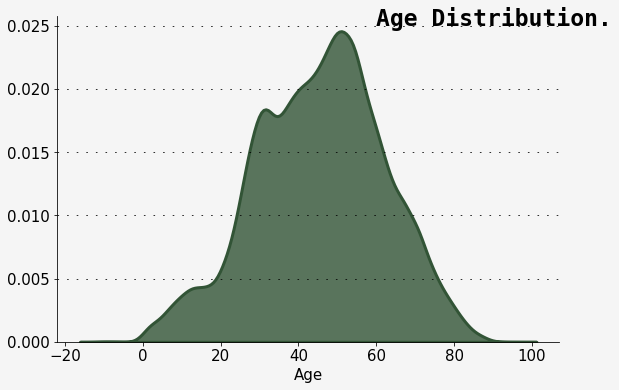

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.kdeplot(train_data['Age'], shade=True, color='#325436', alpha=0.8, linewidth=3,)
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('')
ax.set_xlabel('Age')
ax.grid(False)
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
ax.text(60, 0.025, 'Age Distribution.', fontsize=23, fontweight='bold', fontfamily='monospace')
plt.show()

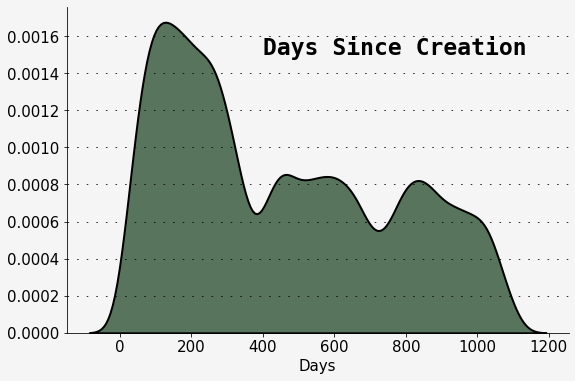

In [19]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.kdeplot(train_data['DaysSinceCreation'], shade=True, color='#325436', alpha=0.8, linewidth=2, edgecolor='black')
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('')
ax.set_xlabel('Days')
ax.grid(False)
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
ax.text(400, 0.0015, 'Days Since Creation', fontsize=23, fontweight='bold', fontfamily='monospace')
plt.show()

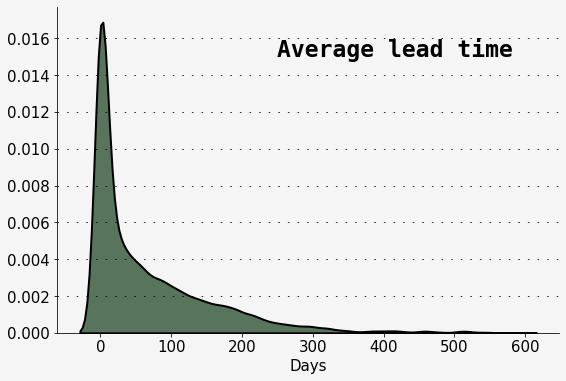

In [20]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.kdeplot(train_data['AverageLeadTime'], shade=True, color='#325436', alpha=0.8, linewidth=2, edgecolor='black')
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('')
ax.set_xlabel('Days')
ax.grid(False)
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
ax.text(250, 0.0150, 'Average lead time', fontsize=23, fontweight='bold', fontfamily='monospace')
plt.show()

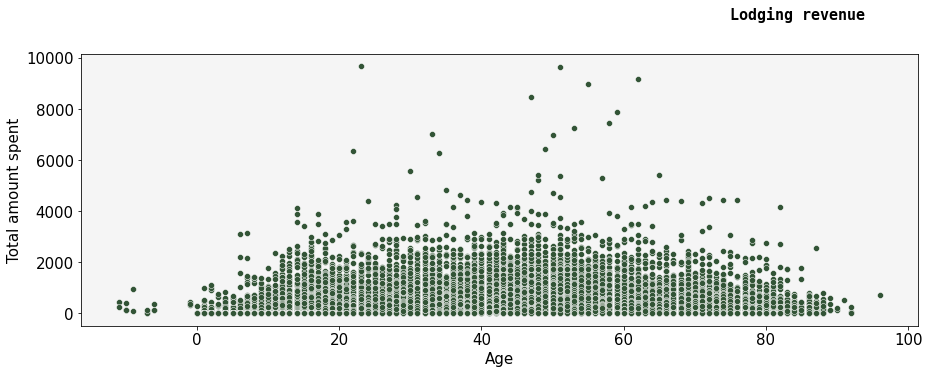

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.set_facecolor('#0000')

sns.scatterplot(x=train_data['Age'], y=train_data['LodgingRevenue'], color='#325436')
ax.set_facecolor('#F5F5F5')
ax.set_xlabel('Age')
ax.set_ylabel('Total amount spent')
ax.text(75, 11500, 'Lodging revenue', fontsize=15, fontweight='bold', fontfamily='monospace')
plt.show()

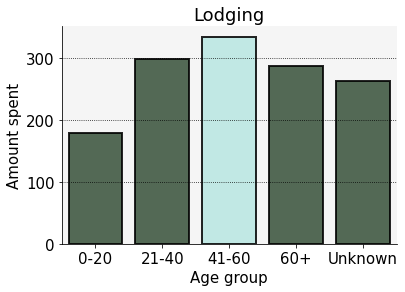

In [22]:
ax = plt.subplot2grid((1,1), (0,0), colspan=1)

sns.barplot(data=avg_by_age, x=avg_by_age.index, y='LodgingRevenue',
            alpha=0.85, linewidth=2, edgecolor='black', ax=ax, palette=['#325436', 
                                                                          '#325436', 
                                                                          '#B1EDE8', 
                                                                          '#325436'])
ax.set_title('Lodging')
ax.set_ylabel('Amount spent')
sns.despine()
ax.set_facecolor('#F5F5F5')
ax.set_xlabel('Age group')
ax.xaxis.grid(False, which='major')
ax.yaxis.grid(True, linestyle=':', color='black')
fig.tight_layout()
plt.show()

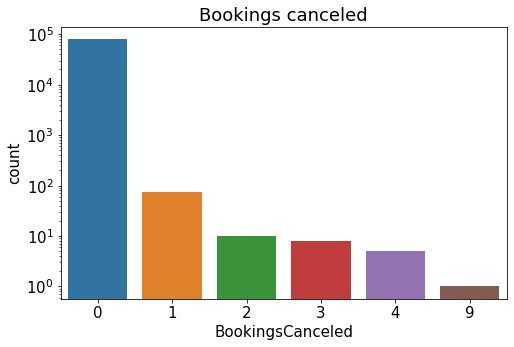

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='BookingsCanceled',data=train_data)
plt.yscale("log")
plt.title("Bookings canceled")
plt.show()

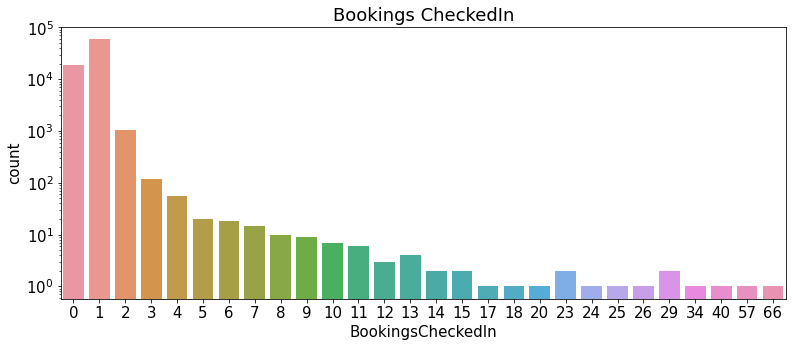

In [24]:
plt.figure(figsize=(13,5))
sns.countplot(x='BookingsCheckedIn',data=train_data)
plt.yscale("log")
plt.title("Bookings CheckedIn")
plt.show()

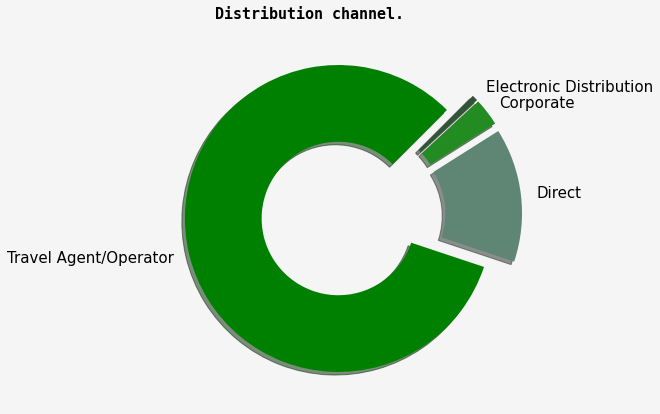

In [26]:
dist_channels = train_data['DistributionChannel'].value_counts()
ms_labels = ['Other', 'Travel Agent / Operator', 'Direct', 'Groups', 'Corporate\n', 'Complementary\n', '\nAviation']
fig = plt.figure(figsize=(12, 6), facecolor='#F5F5F5')
ax = fig.add_subplot()
cmap = ['#008000', '#5F8575', '#228B22', '#325436']
ax.pie(dist_channels, labels=dist_channels.index, explode=[0.1, 0.1, 0.1, 0.1], 
        colors=cmap, wedgeprops=dict(width=0.5), shadow=True, startangle=45)
ax.text(-0.9, 1.28, 'Distribution channel.', fontsize=15, fontweight='bold', fontfamily='monospace')
plt.tight_layout()
plt.show()

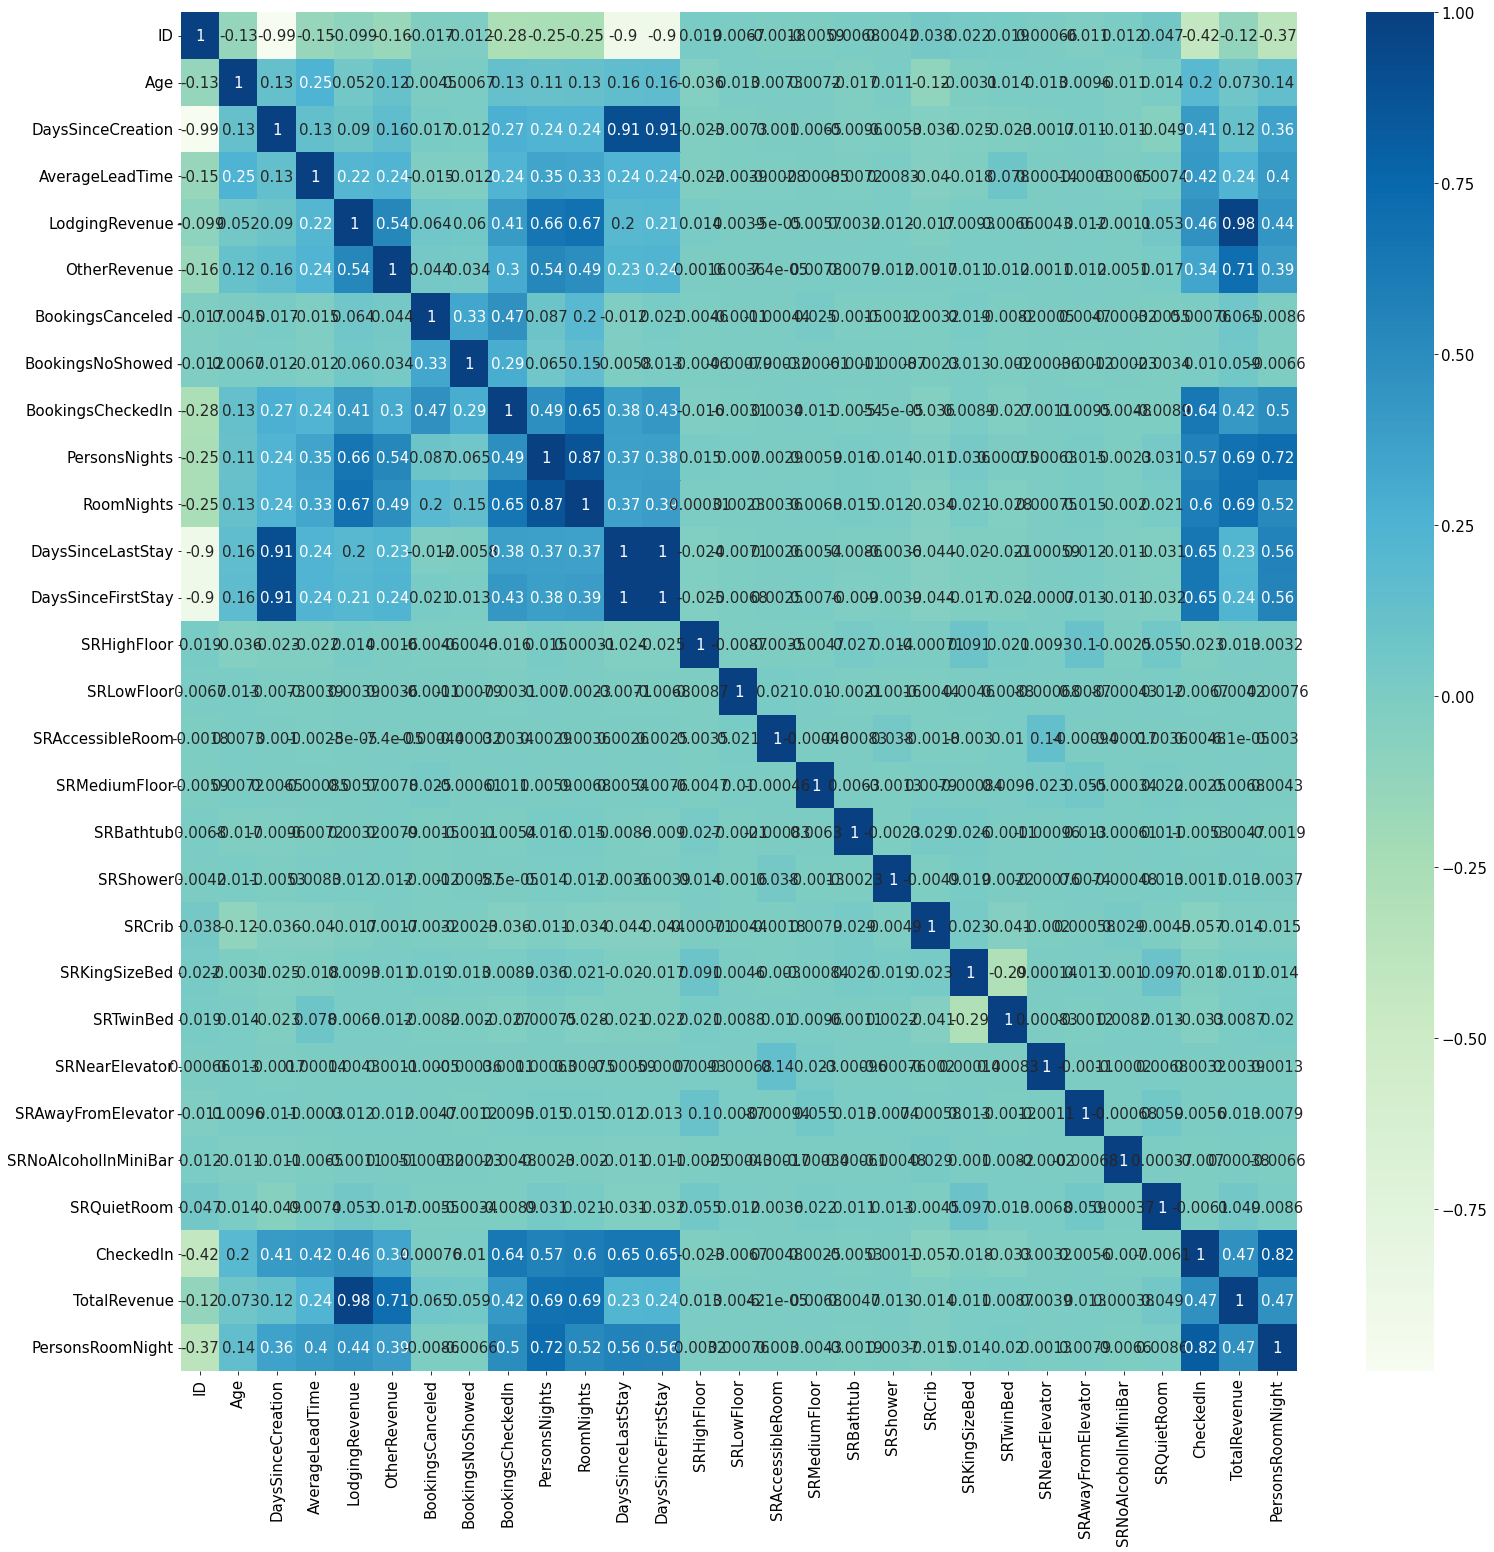

In [27]:
cmat = train_data.corr()
features = cmat.index
plt.figure(figsize=(25,25))
sns.heatmap(train_data[features].corr(),annot=True,cmap="GnBu")

# **PREPROCESSING OF DATA**

In [40]:

X = train_data.drop(['ID', 'Nationality',"CheckedIn","TotalRevenue","PersonsRoomNight","DaysSinceLastStay","DaysSinceFirstStay",'ID', 'AgeGroups','MarketSegment', 'DistributionChannel'],axis=1)
y = train_data['CheckedIn']
X.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [41]:
y.value_counts()

1    60231
0    18595
Name: CheckedIn, dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X = scaler.fit_transform(X)


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape


(700, 23)

In [125]:
y_train.shape

(700,)

# **MACHINE LEARNING TRAINING AND CLASSIFICATION**

In [126]:
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from pandas_profiling import ProfileReport


In [127]:
LR = LogisticRegression().fit(X_train,y_train)
KNN = KNeighborsClassifier().fit(X_train,y_train)
DT = DecisionTreeClassifier().fit(X_train,y_train)
RF = RandomForestClassifier().fit(X_train,y_train)
XGB = XGBClassifier().fit(X_train,y_train)

In [128]:
algo = [LR,KNN,DT,RF,XGB]

In [129]:
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in algo]
models = ['Logistic Regression','K Nearest Neighbour', 'Decision Tree', 'Random Forest', 'XgBoost']
Final = pd.DataFrame({'Models':models,'Accuracy':accuracy})

In [130]:
Final

,Models,Accuracy
0,Logistic Regression,1.000000
1,K Nearest Neighbour,0.996667
2,Decision Tree,1.000000
3,Random Forest,1.000000
4,XgBoost,1.000000


In [131]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    y=Final['Accuracy'], x=Final['Models'],
    mode='markers',
    marker_size=40)
])

fig.show()

# **ARTIFICIAL NUERAL NETWORK FOR CLASSIFICATION**

In [132]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,Conv1D,Flatten,MaxPooling1D,BatchNormalization
from keras.models import Sequential
import keras
from keras import layers
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [133]:
model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 23))

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))



In [134]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [135]:
history = model.fit(X_train, y_train, batch_size = 32, epochs =10,  validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 0.6902 - accuracy: 0.8143 - val_loss: 0.6782 - val_accuracy: 0.9929
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6473 - accuracy: 0.9125 - val_loss: 0.5250 - val_accuracy: 0.9929
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.9411 - val_loss: 0.3286 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.9554 - val_loss: 0.2884 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.9411 - val_loss: 0.2257 - val_accuracy: 0.9929
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.9304 - val_loss: 0.1256 - val_accuracy: 0.9929
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2163 - accuracy: 0.9286 - val_loss: 0.0826 - val_accuracy: 0.9929
Epoch 8/10
18/18 [=

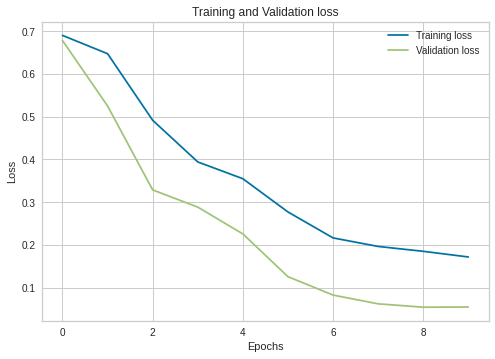

In [136]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()




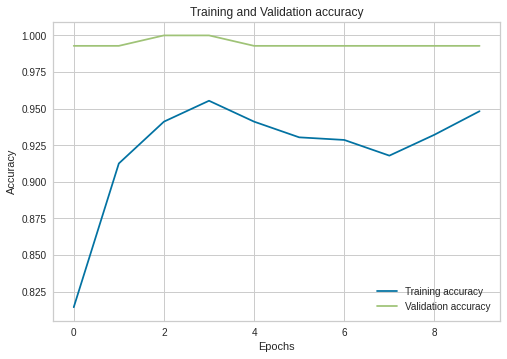

In [137]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']],  label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],  label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [138]:
from sklearn import metrics
y_pred = model.predict(X_test)

In [139]:
y_pred = (y_pred > 0.5)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       163
           1       1.00      0.99      1.00       137

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



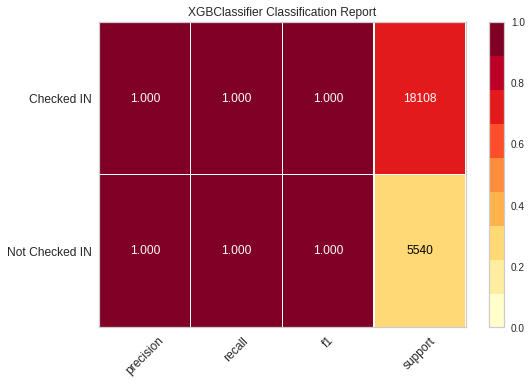

In [80]:
from yellowbrick.classifier import ClassificationReport

classs = ['Not Checked IN','Checked IN']
visualizer = ClassificationReport(XGB, classes=classs, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

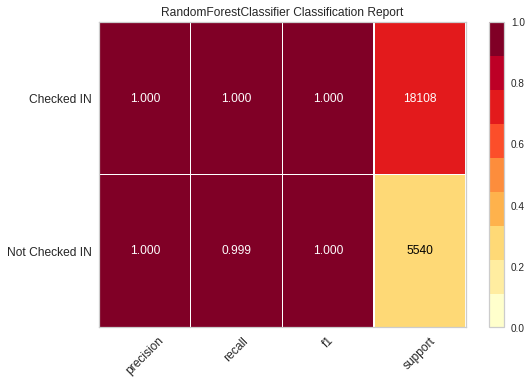

In [81]:
from yellowbrick.classifier import ClassificationReport

classs = ['Not Checked IN','Checked IN']
visualizer = ClassificationReport(RF, classes=classs, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

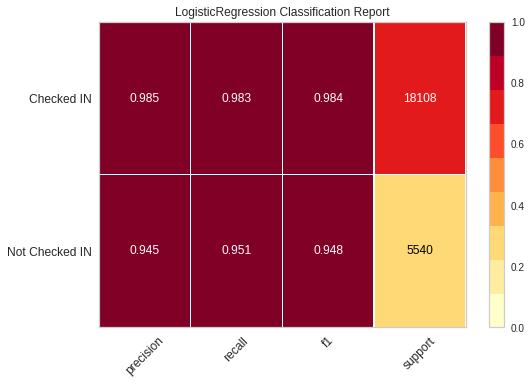

In [82]:
from yellowbrick.classifier import ClassificationReport

classs = ['Not Checked IN','Checked IN']
visualizer = ClassificationReport(LR, classes=classs, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

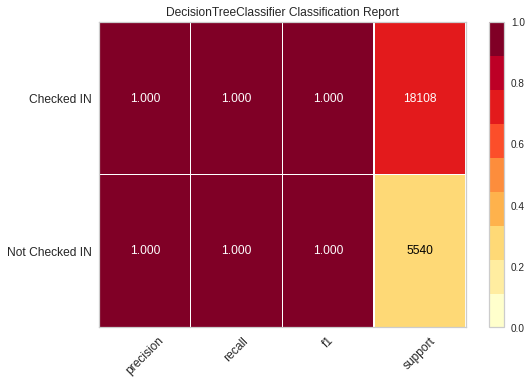

In [83]:
from yellowbrick.classifier import ClassificationReport

classs = ['Not Checked IN','Checked IN']
visualizer = ClassificationReport(DT, classes=classs, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

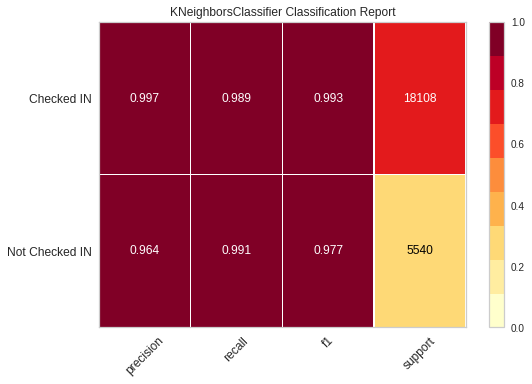

In [84]:
from yellowbrick.classifier import ClassificationReport

classs = ['Not Checked IN','Checked IN']
visualizer = ClassificationReport(KNN, classes=classs, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [158]:
import pickle

file=open('DT.pkl',"wb")


pickle.dump(DT,file)

***TEST DATASET***

In [141]:
test_data = pd.read_csv("/content/gdrive/MyDrive/Nextgrowtlabs/Datasets/test_data_evaluation_part2.csv",index_col=0)

In [142]:
test_data['CheckedIn'] = np.where(((test_data['BookingsCheckedIn']-test_data['BookingsCanceled'])>0),1,0)
test_data.dropna(inplace=True)

In [143]:
X = test_data.drop(['ID', 'Nationality',"CheckedIn","DaysSinceLastStay","DaysSinceFirstStay",'ID','MarketSegment', 'DistributionChannel'],axis=1)
y = test_data['CheckedIn']
X.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [144]:
y.value_counts()

0    495
1    472
Name: CheckedIn, dtype: int64

In [145]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data= test_data[test_data['Age'] < 100]

In [146]:
y_pred=DT.predict(X)

print("The Accuracy score is :", accuracy_score(y, y_pred))

The Accuracy score is : 1.0


In [147]:
test_y_pred = model.predict(X)
test_y_pred = (test_y_pred > 0.8)

In [153]:
test_y_pred=np.round(test_y_pred)


In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y, test_y_pred)


print("The Accuracy score is :", accuracy_score(y, test_y_pred))

The Accuracy score is : 0.9927611168562565


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



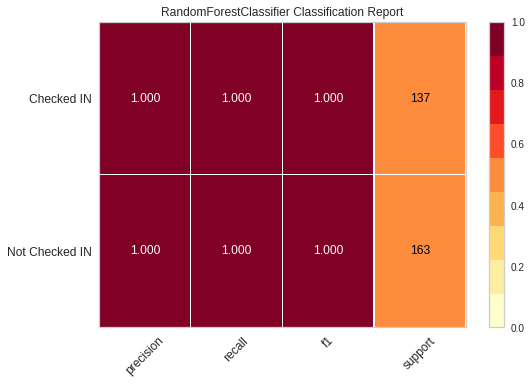

In [155]:
from yellowbrick.classifier import ClassificationReport

classs = ['Not Checked IN','Checked IN']
visualizer = ClassificationReport(RF, classes=classs, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [152]:
model.save("model.h5")